# Esercitazione di Laboratorio n. 1 #

- *Parte I: Generazione di numeri aleatori*

Scrivere un programma che, generata una sequenza di numeri aleatori tra 0 ed 1, ne calcoli la media, la deviazione standard, il massimo e minimo valore. Per il calcolo della deviazione standard usare la formula data.

$\displaystyle S^2 = \frac{1}{N-1} \left[ \sum_{i=1}^N x_i^2 - N \bar{x}^2 \right] $

Verificare che all'aumentare del numero di estrazioni $N$ la media e la deviazione standard tendono ai valori attesi per una distribuzione uniforme definita in $[0,1)$. Quali sono i valori attesi?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as ran
from time import time
ε=10**(-6)          #errore relativo massimo tollerato sulla stima di media e varianza
μ=0.5               #media e varianza esatte per la distribuzione uniforme in [0,1]
σ2=1/12
Nlim=1*10**6        #per evitare che il tempo di esecuzione aumenti troppo, si introduce una soglia
                    #oltre la quale non vengono più generati numeri casuali, a prescindere se si è
                    #rientrati oppure no nei margini di errore prescritti


t=time()            #si fa partire il cronometro per il calcolo del tempo di esecuzione

seed1=1000          #in questa fase si analizza come varia il numero N di numeri da generare casualmente per raggiungere
seed2=1010          #la soglia di errore tollerata. N è studiato al variare del seed tra due estremi, per un numero di
Nseeds=101          #punti pari a Nseeds
X_seeds=np.linspace(seed1,seed2,Nseeds)
Y_seeds=[]

for seed in X_seeds:                   #al variare del seed nell'array X_seeds si aggiorna il seed con cui generare
    ran.seed(seed)
    x1,x2 = ran.random(),ran.random()  #partiamo da due numeri in modo da poter definire, oltre la media, anche la varianza
    Num=2                              #inizializziamo quindi il contatore di numeri casuali
    Sum=x1+x2                          #inizializziamo la somma dei numeri e dei loro quadrati, in modo da aggiornare...
    Sum2=x1**2+x2**2                   #...in modo più efficiente media e varianza
    mi=(x1+x2)/2                       #inizializziamo media e varianza nel caso Num=2
    S2= Sum2 - 2*mi**2

    while abs(mi-μ)/μ >=ε or abs(S2-σ2)/σ2 >=ε:  #il costrutto iterativo è eseguito finché gli errori relativi su media e
        x=ran.random()                           #varianza non diventano entrambi minori di ε
        Num+=1
        Sum=Sum+x
        Sum2=Sum2+x**2
        mi=Sum/Num
        S2 = (Sum2 - Num*mi**2)/(Num-1)

        if Num>=Nlim:                            #se il contatore eccede la soglia imposta, il costrutto si arresta
            break
    Y_seeds.append(Num)                          #si costruisce in questo modo l'array dei 'Num' da rappresentare al
                                                 #variare del seed
seed_min=X_seeds[np.argmin(Y_seeds)]
N_min=min(Y_seeds)                               #si individuano il minimo dei 'Num' e il seed che lo minimizza. Con questa
                                                 #strategia, anziché tirare a indovinare il seed che minimizzi i numeri da
                                                 #generare, si dispone di un algoritmo che in automatico trovi un un seed
ran.seed(seed_min)                               #candidato. A questo punto si fissa tale seed come predefinito per tutte
x1,x2 = ran.random(),ran.random()                #le operazioni successive.
Num=2                                            #In questa fase si ripetono le stesse operazioni di prima, ma con lo scopo
Sum=x1+x2                                        #di rappresentare la distribuzione dei punti, e l'andamento di media e
Sum2=x1**2+x2**2                                 #varianza al crescere della ricchezza del campione.

mi=(x1+x2)/2
S2= Sum2 - 2*mi**2
m=min(x1,x2)
M=max(x1,x2)

X_sample=[x1,x2]                  #inizializziamo la lista dei numeri causali (da istogrammare), la lista delle medie,
Y_mi=[mi]                         #delle deviazioni standard e degli errori su media e deviazione
Y_S2=[S2]
Yε_mi=[abs(mi-μ)/μ]
Yε_S2=[abs(S2-σ2)/σ2]

while abs(mi-μ)/μ >=ε or abs(S2-σ2)/σ2 >=ε:
    x=ran.random()
    Num+=1
    Sum=Sum+x
    Sum2=Sum2+x**2
    
    mi=Sum/Num
    S2 = (Sum2 - Num*mi**2)/(Num-1)
    m=min(x,m)
    M=max(x,M)
    
    X_sample.append(x)
    Y_mi.append(mi)
    Y_S2.append(S2)
    Yε_mi.append(abs(mi-μ)/μ)
    Yε_S2.append(abs(S2-σ2)/σ2)
    if Num>=Nlim:
        break
                                  #t1 è il tempo trascorso dall'avvio del cronometro. A rigore, l'algoritmo termina dopo
t1=time()-t                       #aver rappresentato tutti i grafici; per cui in seguito si farà ripartire il cronometro.

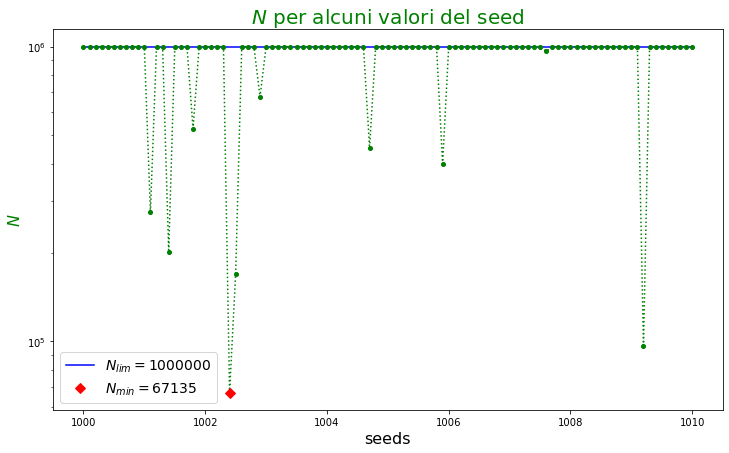

Seed_min = 1002.4


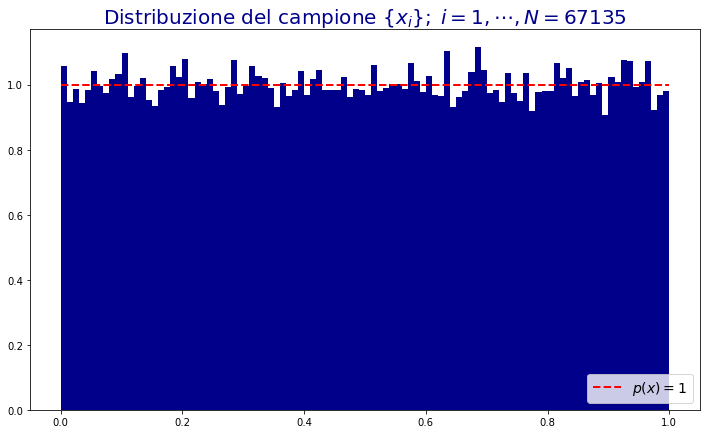

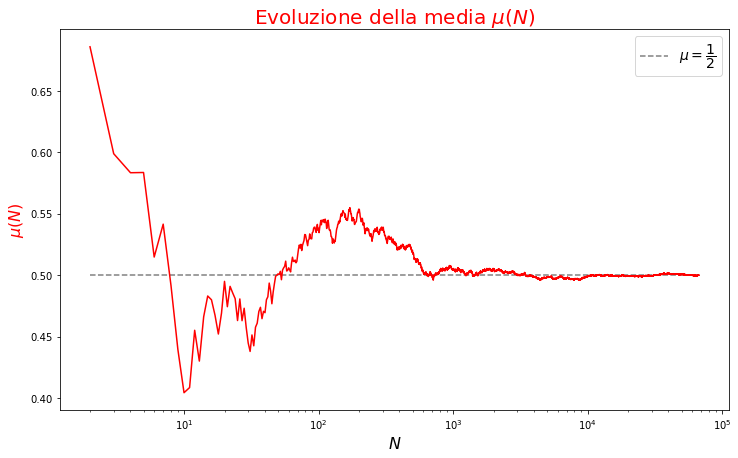

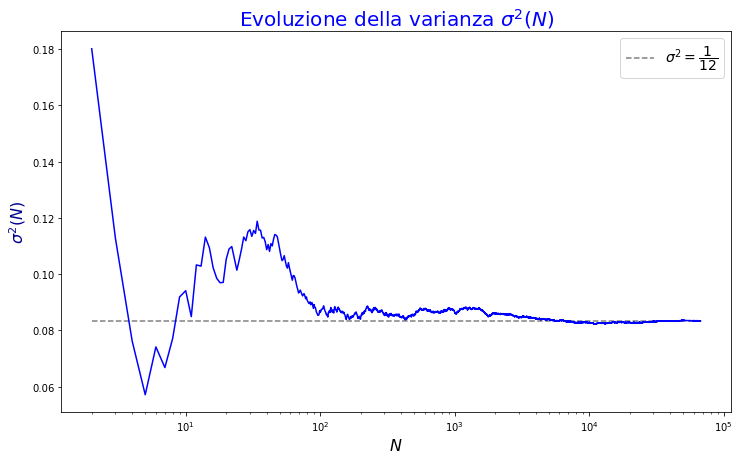

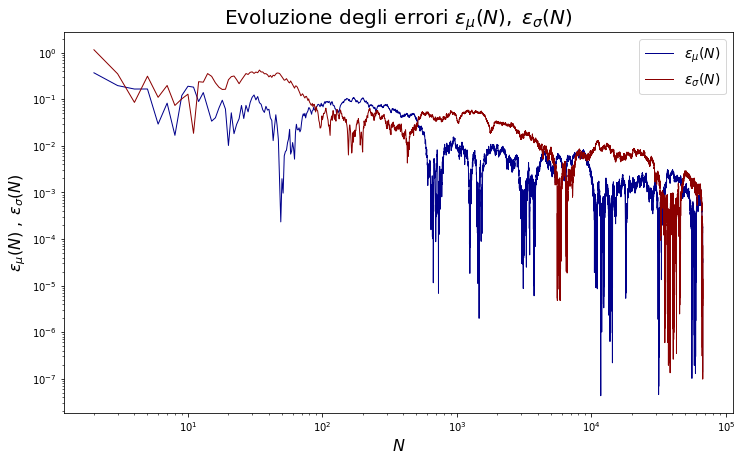

Grandezza del campione: N = 67135
Tolleranza relativa:    ε = 1e-06
Tempo di esecuzione:   Δt = 133.12 s

Media stimata:         mi = 0.5000000706   ; esatta:    μ = 0.5
Varianza stimata:    1/S2 = 11.9999988083  ; esatta: 1/σ2 = 12.0
Minimo stimato          m = 1.46903e-05     ; esatto:    m = 0
Massimo stimato         M = 0.9999906939    ; esatto:    M = 1

Errore relativo su μ:   ε(μ) = 1.413e-07
Errore relativo su σ2: ε(σ2) = 9.93e-08


In [2]:
t=time()

plt.figure(figsize=(12,7))                                               #rappresentazione di N al variare del seed;
plt.title('$N$ per alcuni valori del seed',color='green',size=20)        #notare come molto spesso N risulta uguale alla
plt.plot([seed1,seed2],[Nlim,Nlim],'b',label='$N_{lim}=$'+str(Nlim))     #soglia fissata Nlim (in realtà sarebbe maggiore)
plt.plot(X_seeds,Y_seeds,'o:g',ms=4)
plt.plot([seed_min], [N_min],'D r',ms=7,label='$N_{min}=$'+str(N_min))
plt.xlabel('seeds',size=16)
plt.ylabel('$N$',color='green',size=16)
plt.yscale('log')                                                        #visto che ci si aspetta che N vari tra più ordini
plt.legend(fontsize=14)                                                  #di grandezza, è preferibile usare per l'asse y
plt.show()                                                               #la scala logaritmica
print('Seed_min =',seed_min)

plt.figure(figsize=(12,7))                                               #rappresentazione della distribuzione del campione
plt.hist(X_sample,bins=100,density=True,color='darkblue')                #in forma di istogramma
plt.plot([0,1],[1,1],'--r',lw=2,label='$p(x)=1$')
plt.title('Distribuzione del campione $\{x_i\}; \; i=1,\cdots,N=$'+str(Num),color='darkblue',size=20)
plt.legend(loc='lower right',fontsize=14)
plt.show()

plt.figure(figsize=(12,7))                                               #rappresentazione della media in funzione di N
plt.title('Evoluzione della media $\mu(N)$',color='r',size=20)
plt.plot([2,Num],[μ,μ],'grey',ls='--',label='$\mu=\dfrac{1}{2}$')
plt.plot(np.arange(2,Num+1), Y_mi,'r')
plt.xlabel('$N$',size=16)
plt.ylabel('$\mu(N)$',color='r',size=16)
plt.legend(fontsize=14)
plt.xscale('log')                                                        #per gli stessi motivi di cui sopra, l'asse x
plt.show()                                                               #(degli N) è in scala logaritmica

plt.figure(figsize=(12,7))                                               #rappresentazione della varianza in funzione di N
plt.title('Evoluzione della varianza $\sigma^2(N)$',color='b',size=20)
plt.plot([2,Num],[σ2,σ2],'grey',ls='--',label='$\sigma^2=\dfrac{1}{12}$')
plt.plot(np.arange(2,Num+1), Y_S2,'b')
plt.xlabel('$N$',size=16)
plt.ylabel('$\sigma^2(N)$',color='darkblue',size=16)
plt.legend(fontsize=14)
plt.xscale('log')
plt.show()

plt.figure(figsize=(12,7))                                               #rappresentazione degli errori relativi su media
plt.title('Evoluzione degli errori $\epsilon_{\mu}(N),\; \epsilon_{\sigma}(N)$',size=20)     #e varianza in funzione di N.
plt.plot(np.arange(2,Num+1),Yε_mi,'darkblue',lw=1,label='$\epsilon_{\mu}(N)$')
plt.plot(np.arange(2,Num+1),Yε_S2,'darkred',lw=1,label='$\epsilon_{\sigma}(N)$')
plt.xlabel('$N$',size=16)
plt.ylabel('$\epsilon_{\mu}(N) \;,\; \epsilon_{\sigma}(N)$',size=16)
plt.legend(fontsize=14)
plt.xscale('log')                                                        #In questo caso è conveniente porre anche l'asse y
plt.yscale('log')                                                        #in scala log: gli errori, avvicinandosi a zero,
plt.show()                                                               #attraversano anch'essi più ordini di grandezza.

t2=time()-t                                                              #t2 è il secondo intervallo di tempo che copre
Δt=t1+t2                                                                 #l'esecuzione del programma. Δt è il totale.

if Num>=Nlim:                                                            #output dei risultati
    print('Grandezza del campione: N >',Num,'(!)')
else: print('Grandezza del campione: N =',Num)
print('Tolleranza relativa:    ε =',ε)
print('Tempo di esecuzione:   Δt =',round(Δt,2),'s')

print('\nMedia stimata:         mi =',round(mi,10),'  ; esatta:    μ =',μ)
print('Varianza stimata:    1/S2 =',round(1/S2,10),' ; esatta: 1/σ2 =',1/σ2)
print('Minimo stimato          m =',round(m,10),'    ; esatto:    m =',0)
print('Massimo stimato         M =',round(M,10),'   ; esatto:    M =',1)

print('\nErrore relativo su μ:   ε(μ) =',round((mi-μ)/μ,10))
print('Errore relativo su σ2: ε(σ2) =', round((S2-σ2)/σ2,10))